In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Câu hỏi 1:

### 1.1 Nội dung câu hỏi:
- Tương quan sức mạnh (Tổng chỉ số) của các Pokemon qua từng thế hệ khác nhau như thế nào?

### 1.2 Lợi ích khi trả lời câu hỏi:
- Thấy được tương quan sức mạnh của pokemon qua các thế hệ.
- Có thể thấy được xu hướng phát triển pokemon trong tương lai.
- Giúp cho người chơi có thêm thông tin để lựa chọn pokemon khi chơi các tựa game có chứa nhiều thế hệ pokemon.
- Những người chơi cạnh tranh ở các giải đấu có thể dùng thông tin này để đưa ra các đội hình hợp lý, chiến thuật tối ưu hơn.

### 1.3 Bước tiền xử lý:
- Kiểm tra các giá trị trống trong cột `Total` và cột `Generation`.
- Đảm bảo kiểu dữ liệu phù hợp để kiểm tra.

### 1.4 Bước phân tích:
- Chia ra các bộ dữ liệu riêng cho từng thế hệ dựa trên `df`.
- Tính trung bình cho cột `Total` của mỗi bộ dữ liệu.
- Biểu diễn tương quan bằng biểu đồ bar.

C:\Users\kdat1\AppData\Local\Temp\ipykernel_8512\3691642078.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bpl = sns.barplot(data = corr_data, palette= 'plasma')


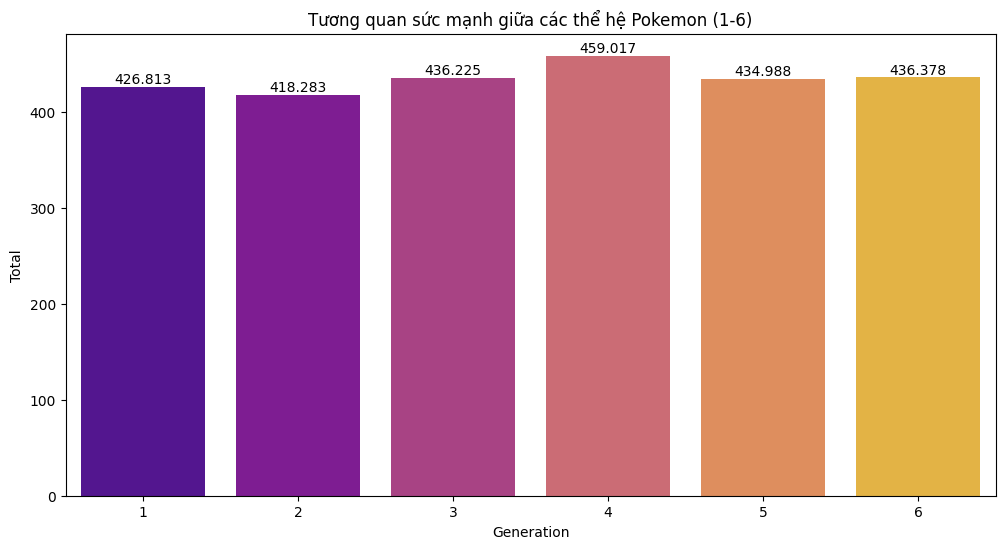

In [34]:
pokemon_data = pd.read_csv('Pokemon.csv')

# Kiểm tra giá trị trống
pokemon_data.dropna(subset=['Total', 'Generation'], inplace=True)

# Tạo nhóm dữ liệu dựa trên thế hệ (Generation)
generation_groups = pokemon_data.groupby('Generation')

# Tính trung bình cột Total
corr_data = generation_groups['Total'].mean()

# Trực quan hóa dữ liệu
plt.figure(figsize=(12, 6))
bpl = sns.barplot(data = corr_data, palette= 'plasma')
for i in range (0,6):
    bpl.bar_label(bpl.containers[i])
plt.title('Tương quan sức mạnh giữa các thể hệ Pokemon (1-6)')
plt.show()

### 1.5 Nhận xét:
- Phân bố:
Biểu đồ gồm 6 cột tương ứng với 6 thế hệ, chiều cao mỗi cột thể hiện trung bình chỉ số sức mạnh của toàn bộ Pokemon thuộc thế hệ đó.
- Cải thiện:
Có thể thêm các cột khác như `Min`, `Max` cho mỗi thế hệ


## Câu hỏi 2:

### 2.1 Nội dung câu hỏi:
- Trong tất cả các Pokemon huyền thoại (Legendary), Pokemon nào mang chỉ số cao nhất đối với từng chỉ số riêng biệt. (VD: Blissey có chỉ số HP cao nhất trong tất cả Pokemon, Shuckle có chỉ số Sp. Def cao nhất trong tất cả Pokemon)

### 2.2 Lợi ích khi trả lời câu hỏi:
- Đây là thông tin hữu ích dành cho người chơi thích hoặc vì chiến thuật cần tập trung vào một chỉ số riêng biệt, có thể áp dụng trong trò chơi thông thường cũng như trong các giải đấu.
- Cung cấp thêm thông tin về các Pokemon mà người chơi có thể chưa biết tới, chưa tiếp cận được, vì Pokemon huyền thoại rất hiếm.
- Có thể lấy những Pokemon này làm cột mốc để đánh giá, phân tích chỉ số của những pokemon khác.

### 2.3 Bước tiền xử lý:
- Kiểm tra giá trị trống trong các cột `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, `Legendary`.
- Đảm bảo kiểu dữ liệu phù hợp cho việc kiểm tra.

### 2.4 Bước phân tích:
- Tạo ra bộ dữ liệu chỉ chứa các Pokemon có `Legendary` là True.
- Xóa các cột không liên quan đến câu hỏi.
- Tìm ra các giá trị cao nhất cho mỗi cột chỉ số.
- Vẽ biểu đồ barplot cho dữ liệu đã lọc ra.

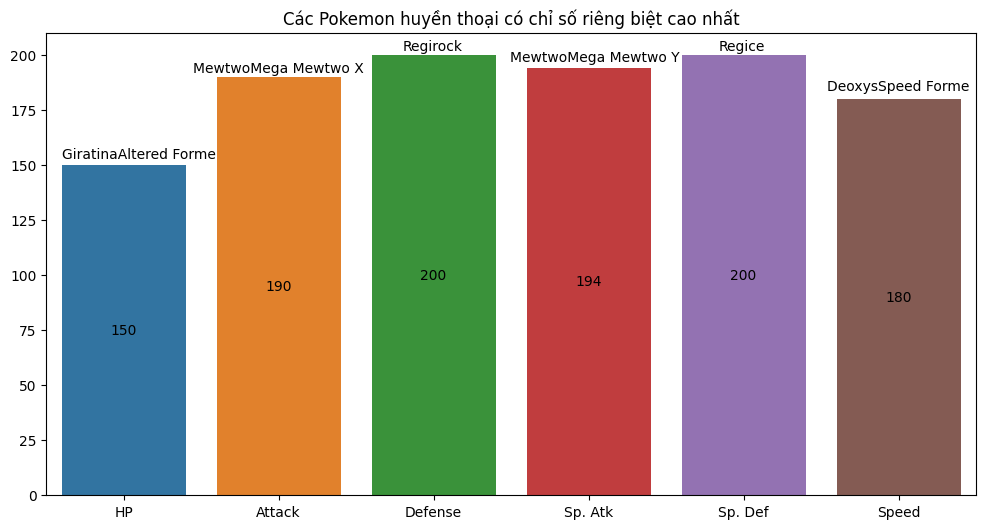

In [146]:
pokemon_data = pd.read_csv('Pokemon.csv')

# Kiểm tra giá trị trống
pokemon_data.dropna(subset=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary'], inplace=True)

# Lọc ra các Pokemon huyền thoại và chỉ giữ lại các cột cần thiết
legendary_pokemon = pokemon_data.loc[pokemon_data['Legendary'] == True].reset_index()
legendary_pokemon = legendary_pokemon.drop(columns = ['index', '#', 'Type 1', 'Type 2', 'Total', 'Generation','Legendary'])

# Tìm ra các Pokemon sở hữu chỉ số riêng biệt cao nhất
max_each_stat = legendary_pokemon.max().to_frame().drop('Name').T
name_idx = legendary_pokemon.idxmax().drop('Name')
max_name = legendary_pokemon['Name'].iloc[name_idx]

# Trực quan hóa dữ liệu
plt.figure(figsize=(12, 6))
bpl = sns.barplot(data = max_each_stat)
for i in range(0,6):
    bpl.bar_label(bpl.containers[i], label_type = 'center')
bpl.annotate(max_name[36], xy = ('HP', 200), xytext = (-0.4,153))
bpl.annotate(max_name[4], xy = ('Attack', 200), xytext = (0.45,192))
bpl.annotate(max_name[11], xy = ('Defense', 200), xytext = (1.8,202))
bpl.annotate(max_name[5], xy = ('Sp. Atk', 200), xytext = (2.49,197))
bpl.annotate(max_name[12], xy = ('Sp. Def', 200), xytext = (3.84,202))
bpl.annotate(max_name[28], xy = ('Speed', 200), xytext = (4.54,184))
plt.title('Các Pokemon huyền thoại có chỉ số riêng biệt cao nhất')
plt.show()

### 2.5 Nhận xét:
- Phân bố:
Mỗi cột ứng với 1 loại chỉ số, chiều cao mỗi cột là giá trị của chỉ số, tên của mỗi cột ứng với Pokemon mang chỉ số đó.
- Đánh giá chỉ số:
Có thể thấy Pokemon huyền thoại có trần chỉ số rất cao, giúp người chơi có thể chọn ra những Pokemon dùng cho chiến thuật vai trò khắc chế (VD: có thể dùng Regice có Sp. Def 200 để khắc chế Mega Mewtwo Y có Sp. Atk 194)
- Cải thiện:
Có thể tạo thêm 1 biểu đồ về các Pokemon không phải huyền thoại có chỉ số riêng biệt cao nhất để so sánh được sự khác biệt giữa Pokemon bình thường và Pokemon huyền thoại.